In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import string
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick

# generate data

## date

In [2]:
date_choices = ['2024/04/01', '2024/04/02', '2024/04/03', '2024/04/04', '2024/04/05']
dates = sum([[x]*30  for x in date_choices], [])

## stocks

In [3]:
stocks = list()
random.seed(0)
for i in  range(30):
 stocks.append("".join(random.choices(string.ascii_uppercase, k=3)))
stocks = 5*stocks

# sectors

In [4]:
sector_choices = ['Finance', 'Energy', 'IT']
sectors = sum(5*[random.choices(sector_choices, k=30)], [])

## returns

In [5]:
np.random.seed(0)
returns = list(np.random.normal(loc=0.0, scale=0.05, size=30*len(date_choices)))

# Create data table

In [6]:
data = pd.DataFrame({'date':dates, 'stock':stocks,  'sector':sectors, 'return':returns})

In [7]:
data1 = data.pipe(lambda x: x.assign(posRet=x['return']>0))\
  .groupby(['date', 'sector']).agg(numPosRet=('posRet','sum'),numStocks = ('stock', 'count'))\
  .pipe(lambda x: x.assign(numStocks=x.groupby('date')['numStocks'].transform('sum'))) \
  .pipe(lambda x: x.assign(positivePct=x['numPosRet']/x['numStocks'])) \
  .reset_index() \
  .pivot(index='date', columns='sector', values='positivePct')

In [16]:
from tabulate import tabulate

In [19]:
print(tabulate(data1, headers='keys', tablefmt='psql'))

+------------+-----------+-----------+----------+
| date       |    Energy |   Finance |       IT |
|------------+-----------+-----------+----------|
| 2024/04/01 | 0.233333  |  0.133333 | 0.333333 |
| 2024/04/02 | 0.0666667 |  0.1      | 0.2      |
| 2024/04/03 | 0.133333  |  0.166667 | 0.166667 |
| 2024/04/04 | 0.333333  |  0.133333 | 0.233333 |
| 2024/04/05 | 0.2       |  0.133333 | 0.233333 |
+------------+-----------+-----------+----------+


In [13]:
data1

sector,Energy,Finance,IT
date,,,
2024/04/01,0.233333,0.133333,0.333333
2024/04/02,0.066667,0.100000,0.200000
2024/04/03,0.133333,0.166667,0.166667
2024/04/04,0.333333,0.133333,0.233333
2024/04/05,0.200000,0.133333,0.233333


In [12]:
data1.apply(lambda x:f'{sum(x):2%}', axis=1)

date
2024/04/01    70.000000%
2024/04/02    36.666667%
2024/04/03    46.666667%
2024/04/04    70.000000%
2024/04/05    56.666667%
dtype: object

In [14]:
type(ax)

matplotlib.axes._axes.Axes

In [44]:
data1[['Energy', 'Finance', 'IT']].applymap(lambda x: f'{x:.2%}')

/tmp/ipykernel_1316284/744473618.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data1[['Energy', 'Finance', 'IT']].applymap(lambda x: f'{x:.2%}')


sector,Energy,Finance,IT
date,,,
2024/04/01,23.33%,13.33%,33.33%
2024/04/02,6.67%,10.00%,20.00%
2024/04/03,13.33%,16.67%,16.67%
2024/04/04,33.33%,13.33%,23.33%
2024/04/05,20.00%,13.33%,23.33%


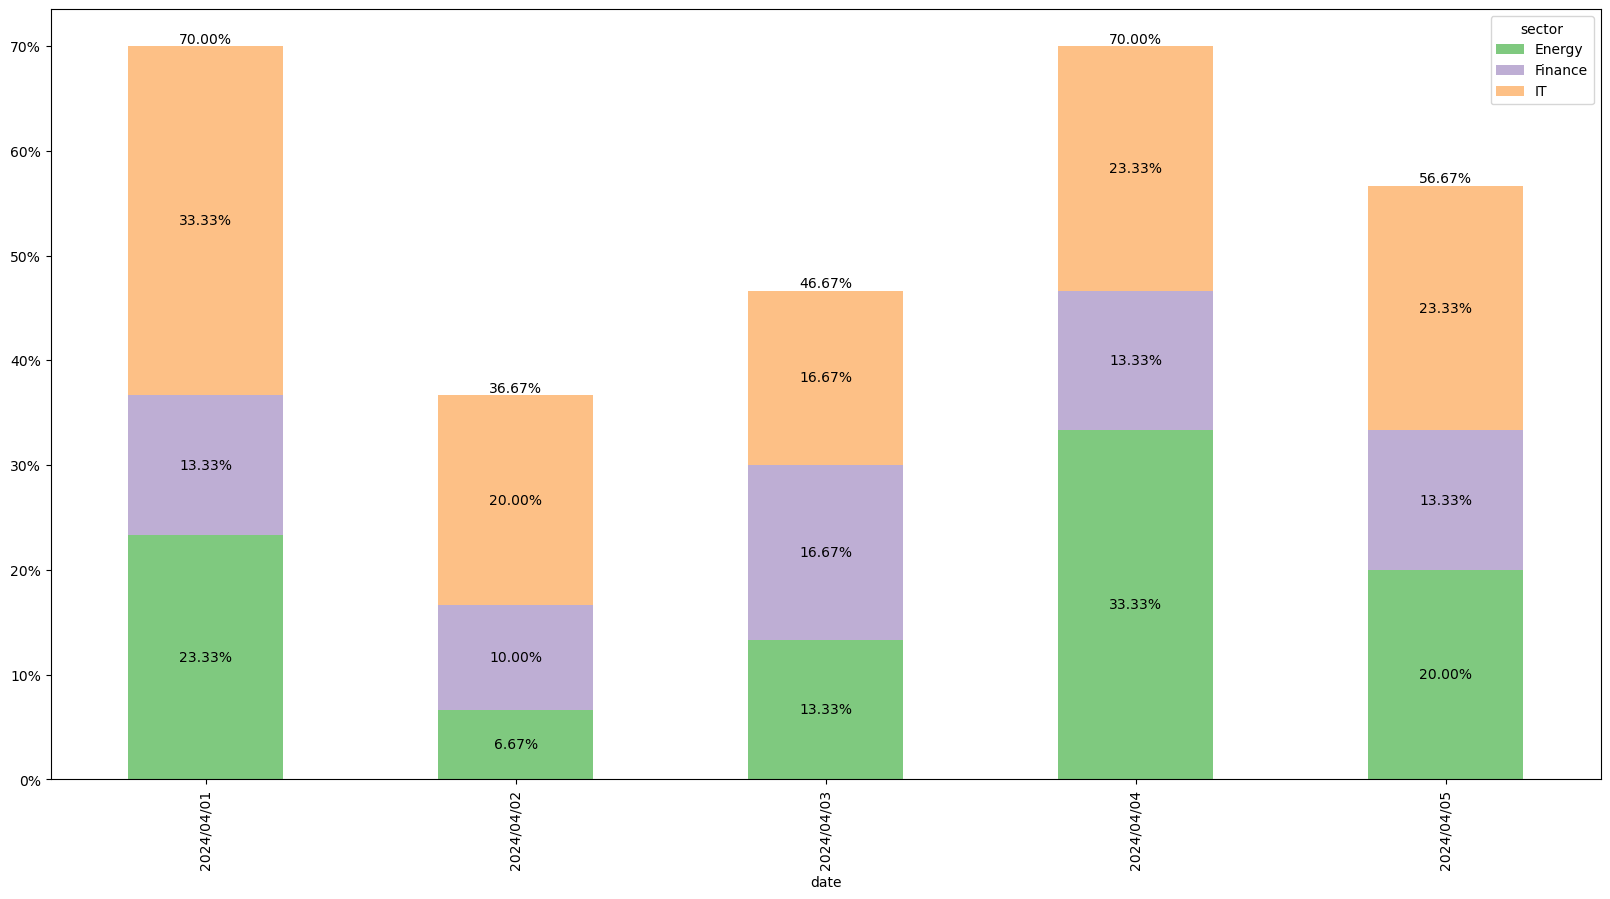

In [54]:
f, ax = plt.subplots()
data1.plot.bar(stacked=True, figsize=(20,10), ax=ax, color = sns.color_palette("Accent", n_colors=3))
for c in ax.containers:
    labels = [f'{v.get_height():.2%}' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
ax.bar_label(ax.containers[-1], labels=data1.apply(lambda x:f'{sum(x):.2%}', axis=1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

/tmp/ipykernel_1316284/440111126.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tb = ax1.table(cellText = data1[['Energy', 'Finance', 'IT']].applymap(lambda x: f'{x:.2%}').values,


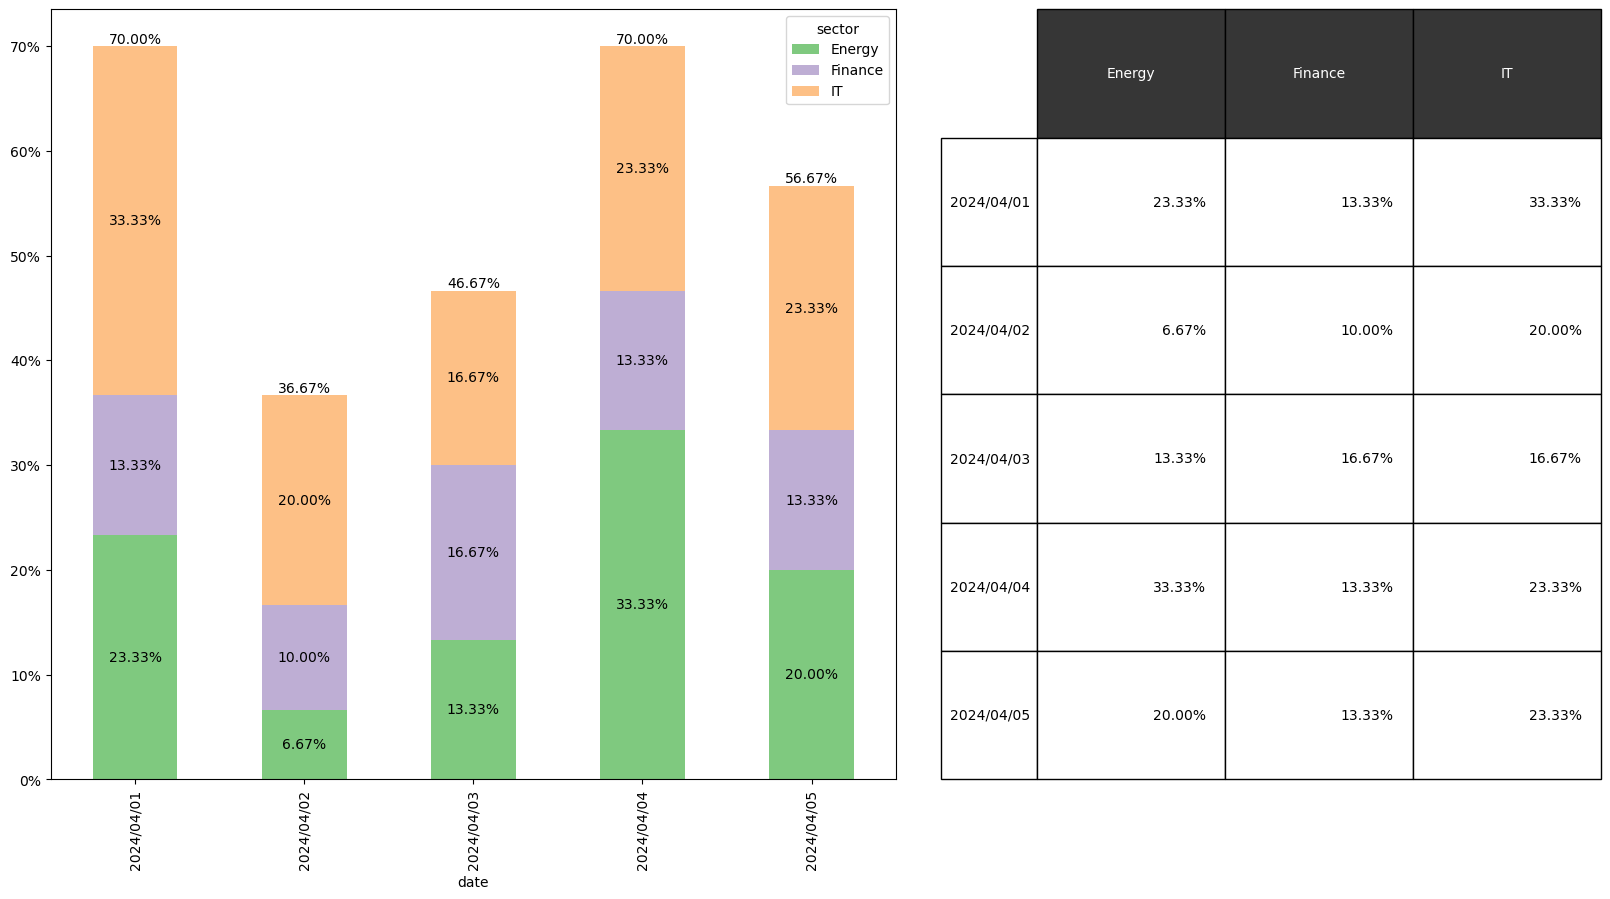

In [52]:
f, (ax, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 2]})
data1.plot.bar(stacked=True, figsize=(20,10), ax=ax, color = sns.color_palette("Accent", n_colors=3))
for c in ax.containers:
    labels = [f'{v.get_height():.2%}' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
ax.bar_label(ax.containers[-1], labels=data1.apply(lambda x:f'{sum(x):.2%}', axis=1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))



ax1.set_axis_off()
tb = ax1.table(cellText = data1[['Energy', 'Finance', 'IT']].applymap(lambda x: f'{x:.2%}').values, 
               rowLabels = data1.index,
               bbox=[0,0,1,1], colLabels=data1.columns)
tb[0, 0].set_facecolor('#363636')
tb[0, 1].set_facecolor('#363636')
tb[0, 2].set_facecolor('#363636')
tb[0, 0].set_text_props(color='w')
tb[0, 1].set_text_props(color='w')
tb[0, 2].set_text_props(color='w')